Verzeo AI Minor Project April Batch

In [ ]:
Importing File Modules

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [12]:
filterwarnings("ignore")

# DATA SOURCE

In [13]:
Heart = pd.read_csv(r"/Users/vinayk/Downloads/heart.csv")
data = Heart.copy()

dataV = data.copy()
dataV["sex"] = pd.Categorical(dataV["sex"])
dataV["cp"] = pd.Categorical(dataV["cp"])
dataV["fbs"] = pd.Categorical(dataV["fbs"])
dataV["restecg"] = pd.Categorical(dataV["restecg"])
dataV["exng"] = pd.Categorical(dataV["exng"])
dataV["slp"] = pd.Categorical(dataV["slp"])
dataV["caa"] = pd.Categorical(dataV["caa"])
dataV["thall"] = pd.Categorical(dataV["thall"])
dataV["output"] = pd.Categorical(dataV["output"])

df = data.select_dtypes(include=["float64","int64","int32"])

## INFORMATIONS

In [15]:
print(data.shape)
print("------"*20)
print(data.columns)
print("------"*20)
print(data.info())
print("------"*20)
print(data.describe())
print("------"*20)
print(df.corr())
print("------"*20)
print(data["sex"].value_counts())
print("------"*20)
print(data["cp"].value_counts())
print("------"*20)
print(data["fbs"].value_counts())
print("------"*20)
print(data["restecg"].value_counts())
print("------"*20)
print(data["exng"].value_counts())
print("------"*20)
print(data["slp"].value_counts())
print("------"*20)
print(data["caa"].value_counts())
print("------"*20)
print(data["thall"].value_counts())
print("------"*20)
print(data["output"].value_counts())
print("------"*20)
print(data.groupby(["sex","output"])["trtbps"].mean())
print("------"*20)
print(data.groupby(["sex","output"])["chol"].mean())
print("------"*20)
print(data.groupby(["sex","output"])["thalachh"].mean())
print("------"*20)
print(data.groupby(["sex","output"])["oldpeak"].mean())
print("------"*20)
print(data.isnull().sum())

(303, 14)
------------------------------------------------------------------------------------------------------------------------
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303

# CORRELATION - NORMALITY - HOMOGENEITY

In [16]:
corrPearson = data.corr(method="pearson")
corrSpearman = data.corr(method="spearman")

## PEARSON CORRELATION

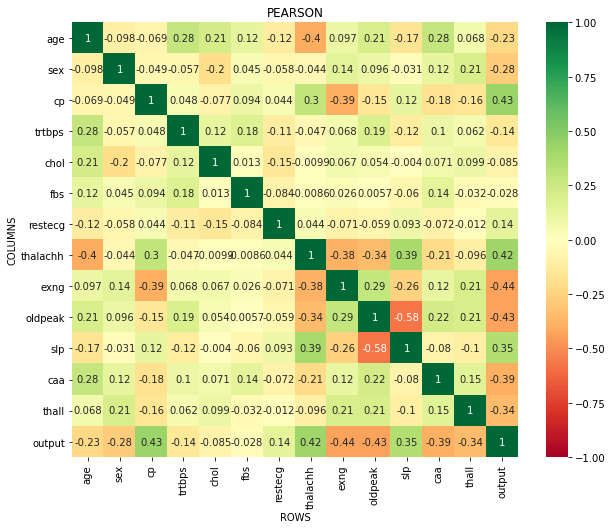

In [17]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("ROWS")
plt.ylabel("COLUMNS")
plt.show()

## SPEARMAN CORRELATION

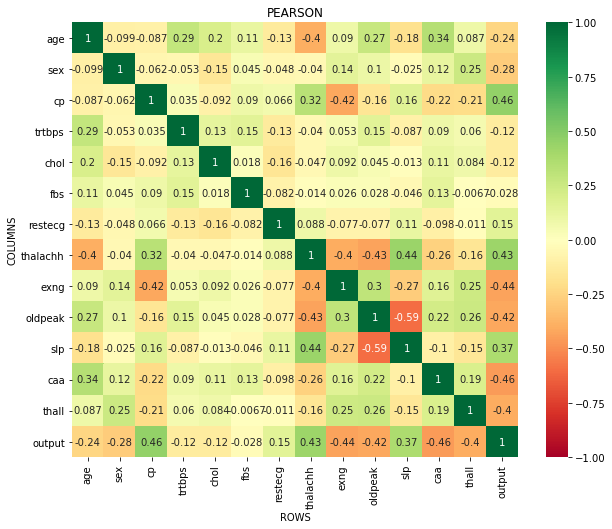

In [18]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("ROWS")
plt.ylabel("COLUMNS")
plt.show()

## NORMALITY

In [19]:
for i in data.columns:
    print("-----"*10)
    print("%.3f - %.3f" % shapiro(data[i]))

--------------------------------------------------
0.986 - 0.006
--------------------------------------------------
0.586 - 0.000
--------------------------------------------------
0.790 - 0.000
--------------------------------------------------
0.966 - 0.000
--------------------------------------------------
0.947 - 0.000
--------------------------------------------------
0.424 - 0.000
--------------------------------------------------
0.679 - 0.000
--------------------------------------------------
0.976 - 0.000
--------------------------------------------------
0.591 - 0.000
--------------------------------------------------
0.844 - 0.000
--------------------------------------------------
0.745 - 0.000
--------------------------------------------------
0.728 - 0.000
--------------------------------------------------
0.751 - 0.000
--------------------------------------------------
0.634 - 0.000


## HOMOGENEITY

In [26]:
print("%.4f - %.4f " % levene(data["age"],data["sex"],data["cp"],data["trtbps"],data["chol"],
                             data["fbs"],data["restecg"],data["thalachh"],data["exng"],data["oldpeak"],
                             data["slp"],data["caa"],data["thall"],data["output"]))

335.1972 - 0.0000 


# VISUALIZATION

### HIST

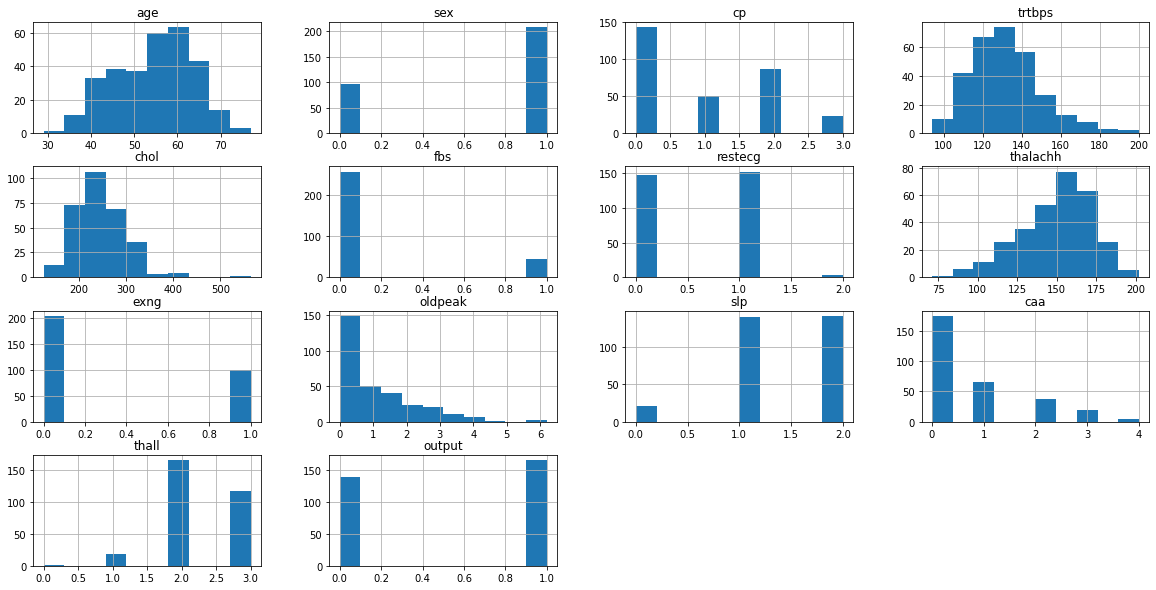

In [27]:
data.hist(figsize=(20,10))
plt.show()

### BOX

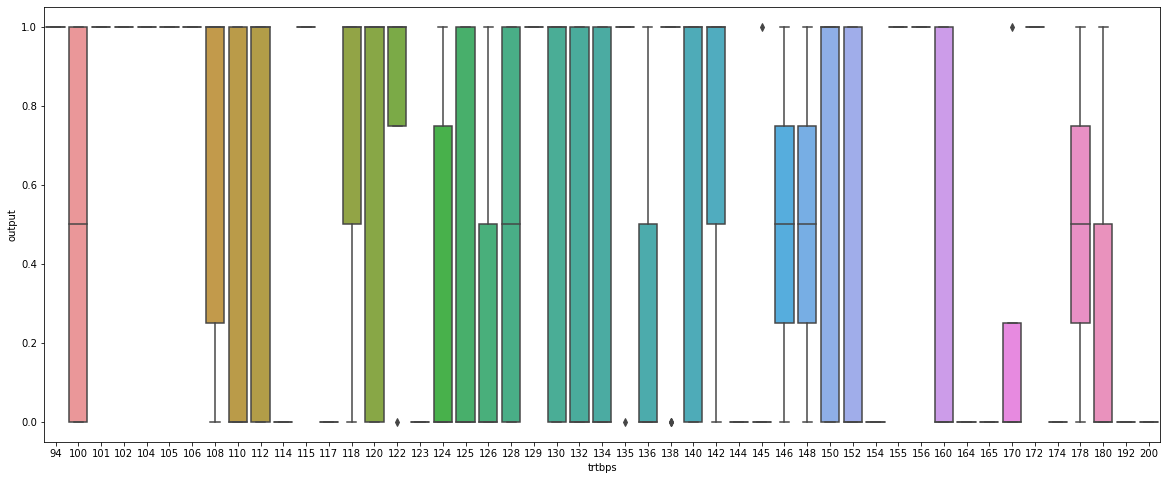

In [28]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="trtbps",y="output",data=dataV)
plt.show()

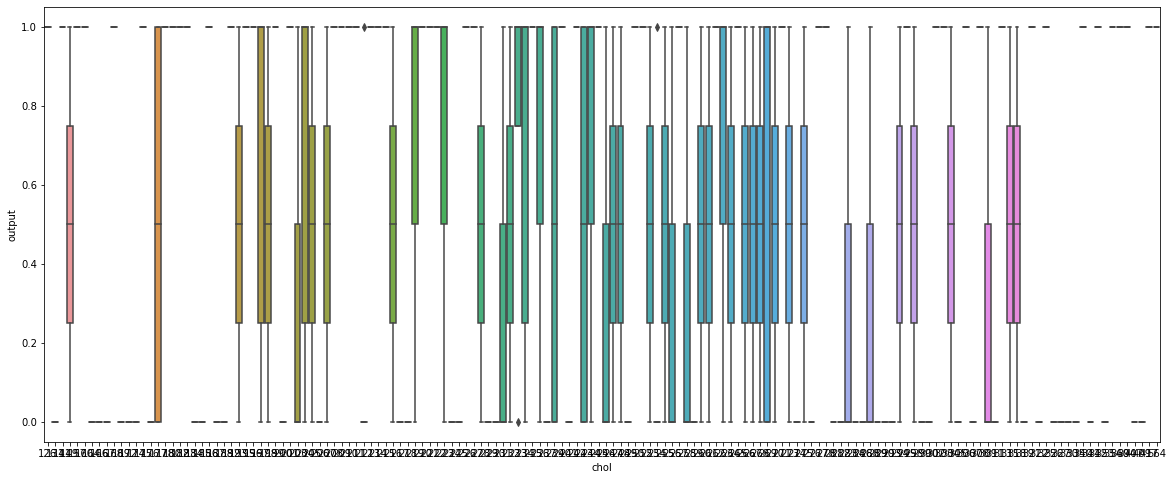

In [29]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="chol",y="output",data=dataV)
plt.show()

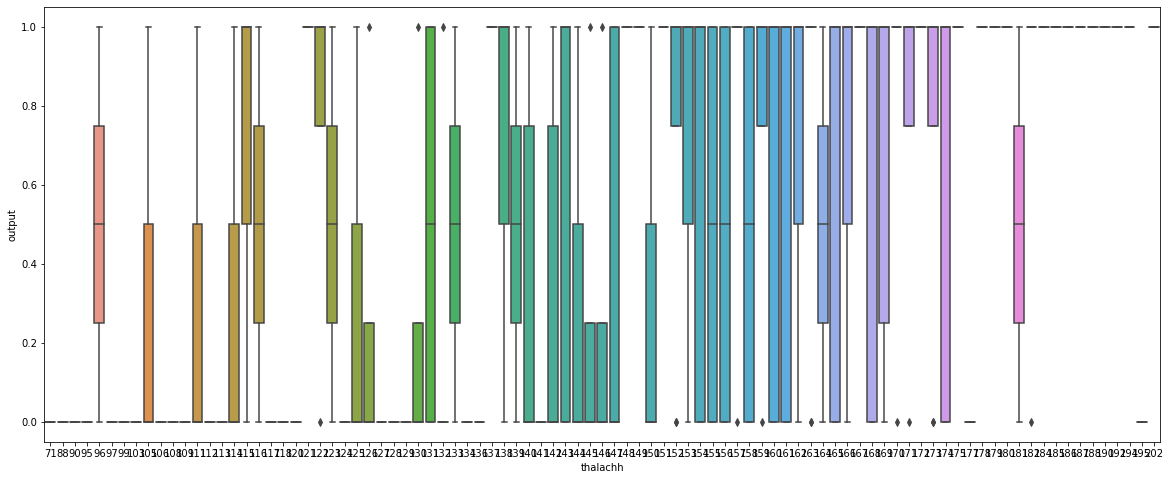

In [30]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="thalachh",y="output",data=dataV)
plt.show()

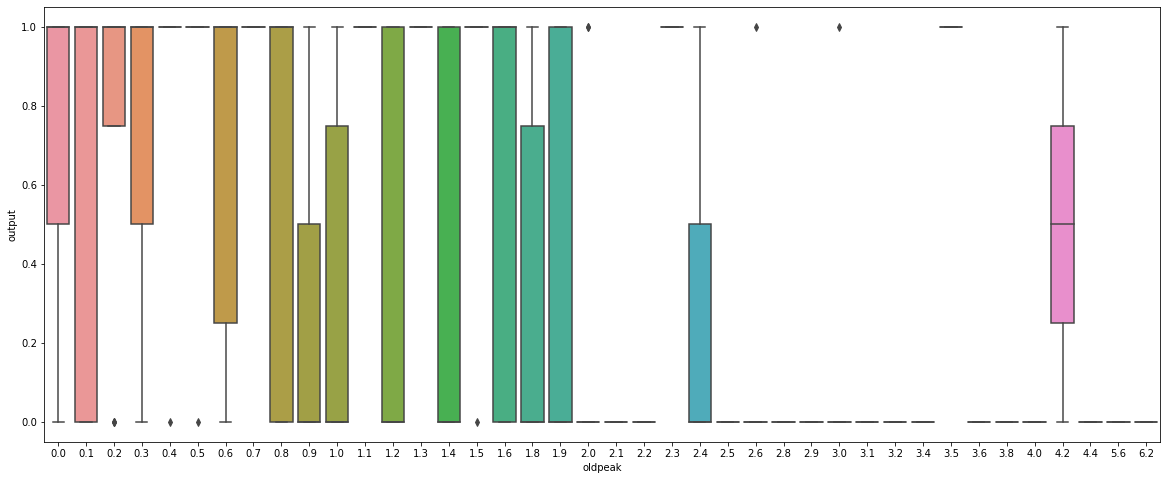

In [31]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="oldpeak",y="output",data=dataV)
plt.show()

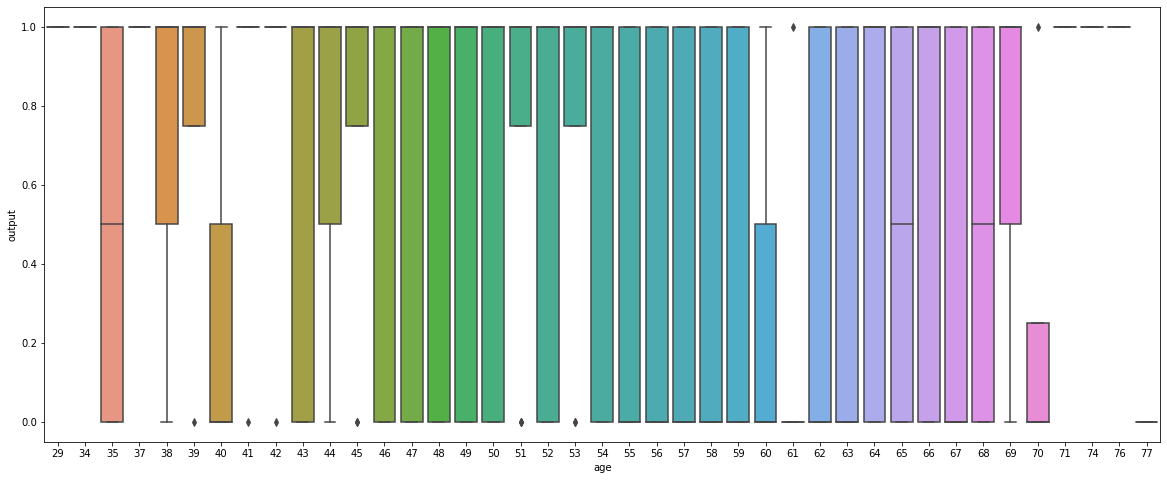

In [32]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="age",y="output",data=dataV)
plt.show()

### BAR

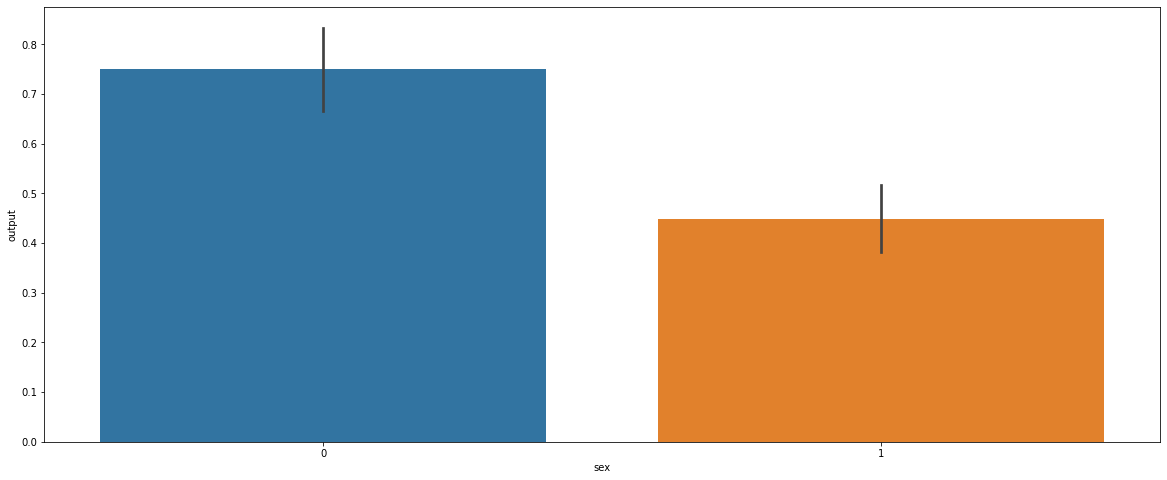

In [33]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="sex",y="output",data=data)
plt.show()

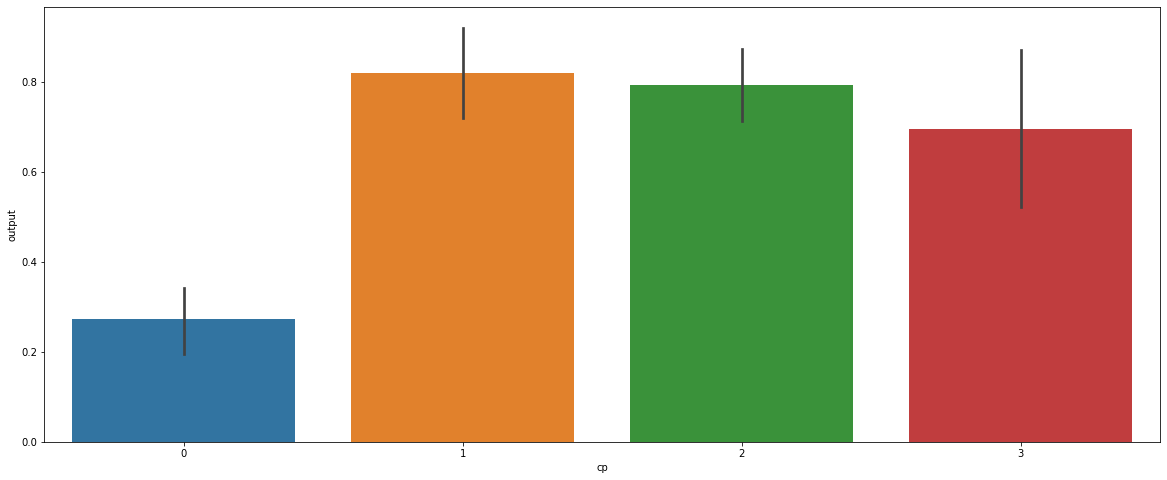

In [34]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="cp",y="output",data=data)
plt.show()

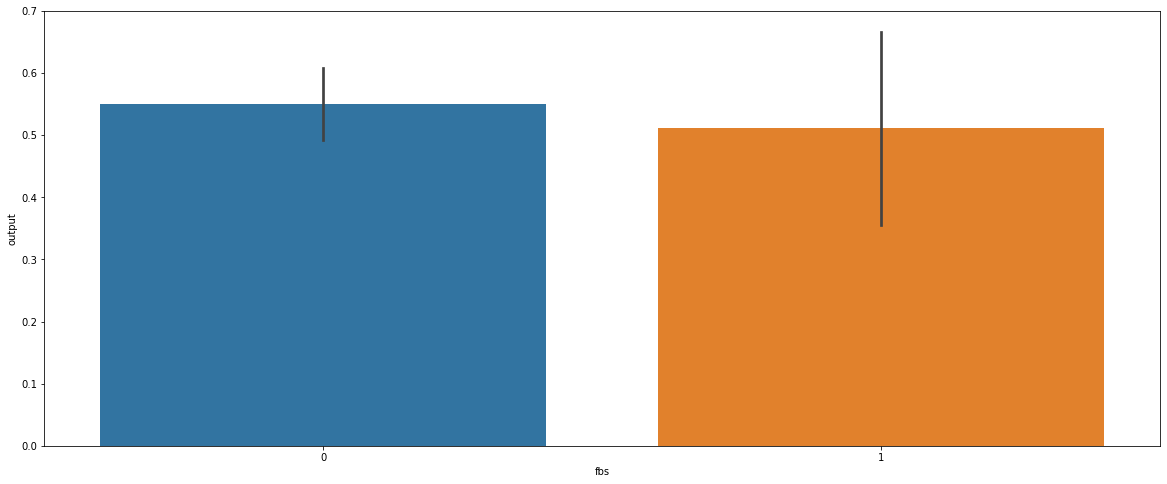

In [35]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="fbs",y="output",data=data)
plt.show()

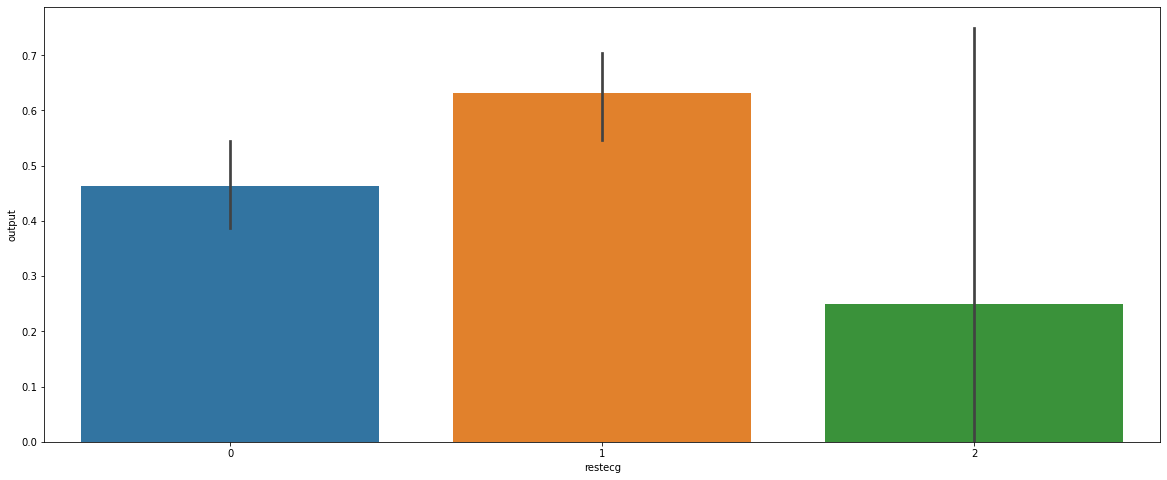

In [36]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="restecg",y="output",data=data)
plt.show()

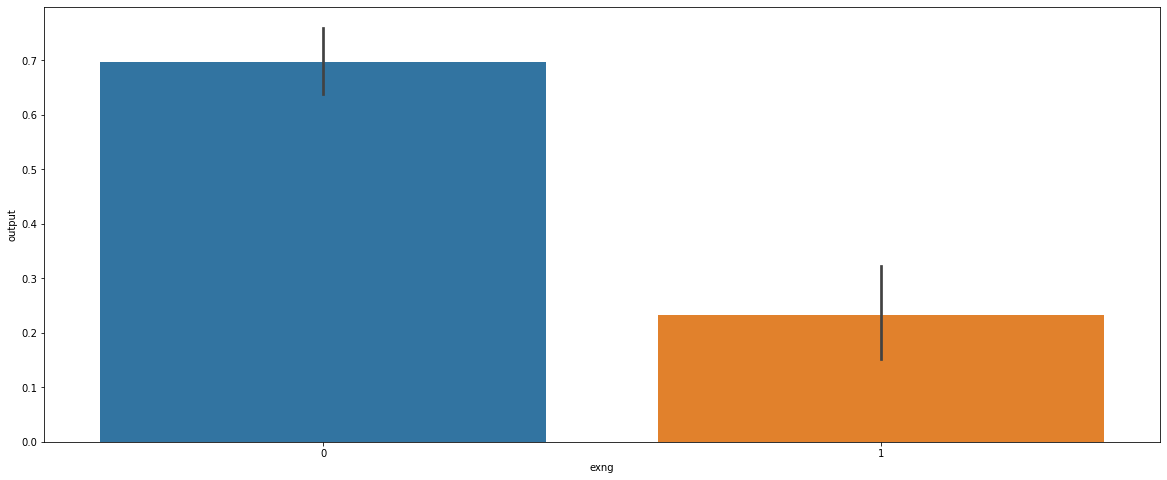

In [37]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="exng",y="output",data=data)
plt.show()

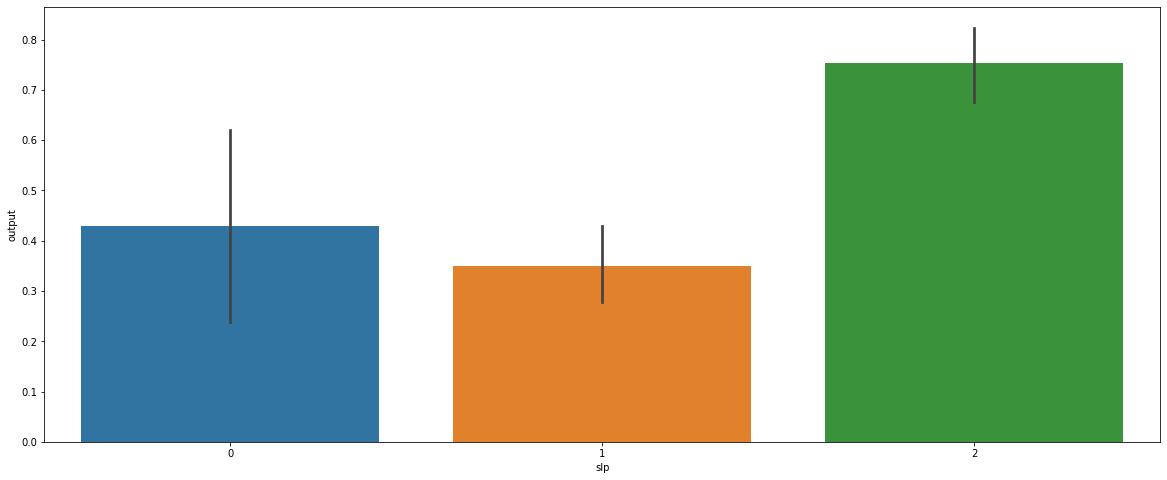

In [38]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="slp",y="output",data=data)
plt.show()

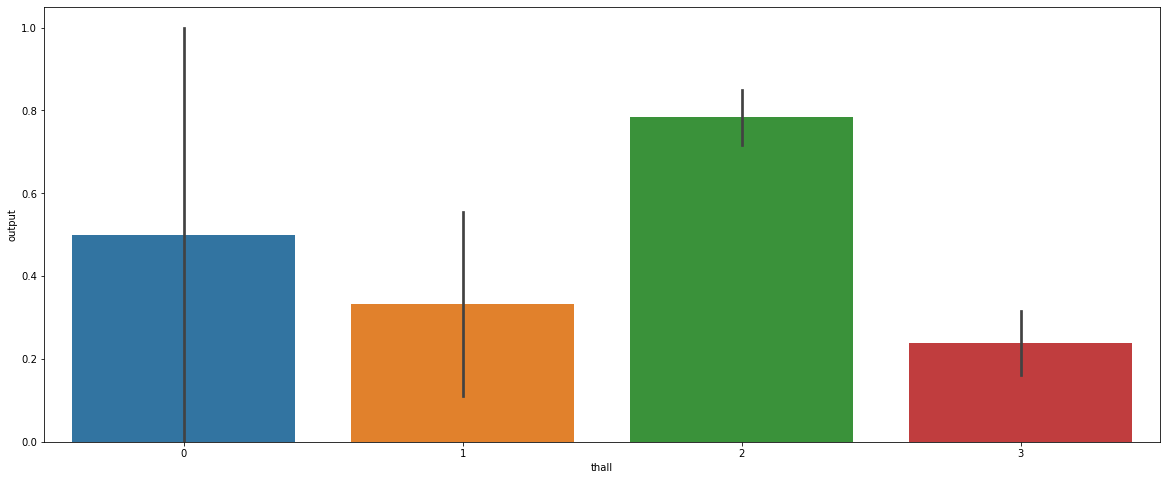

In [39]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="thall",y="output",data=data)
plt.show()

### LINE

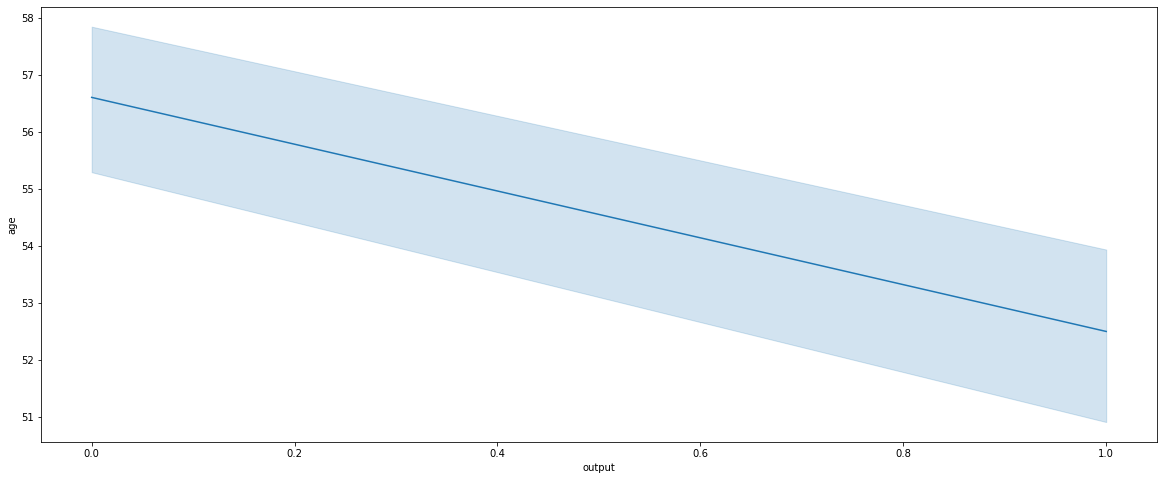

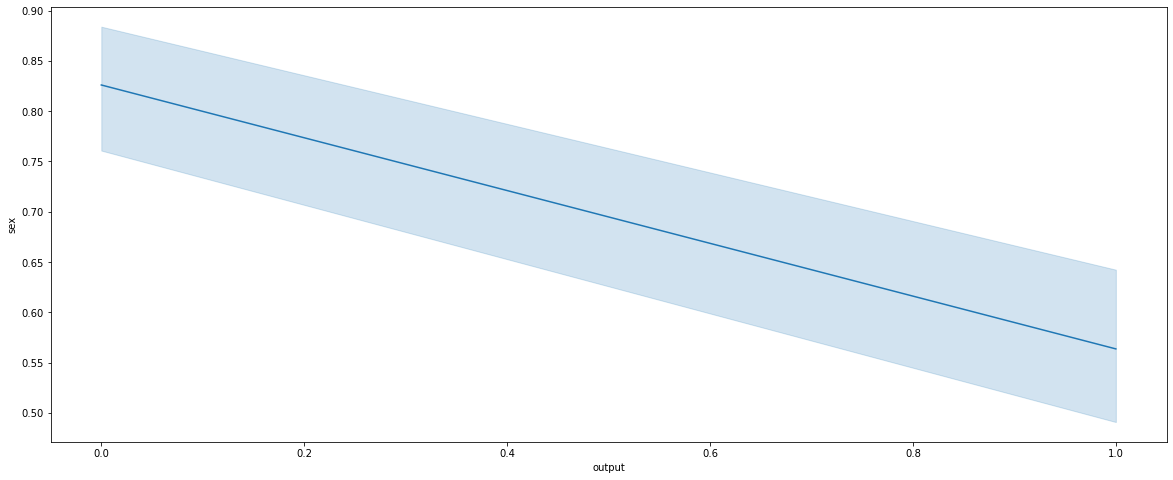

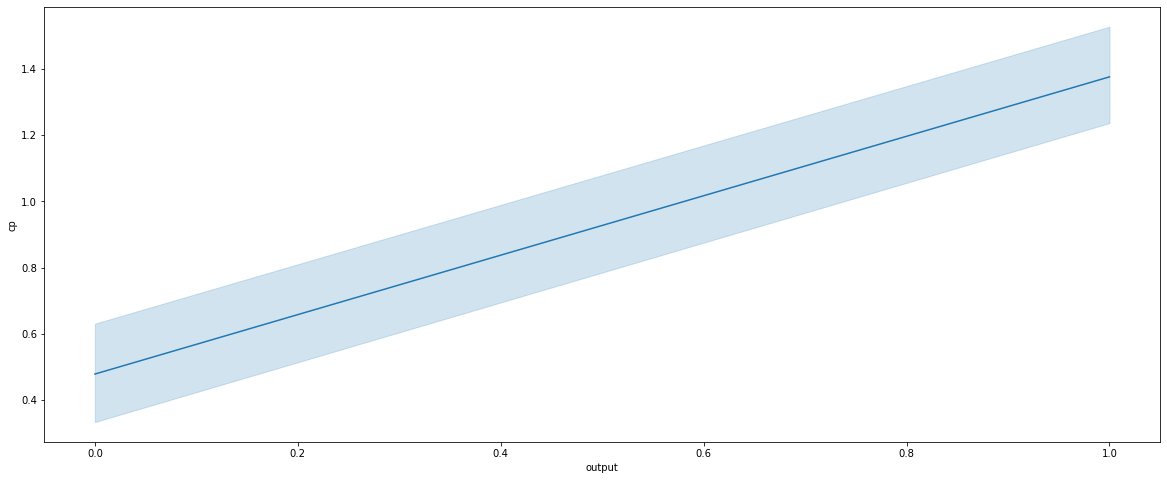

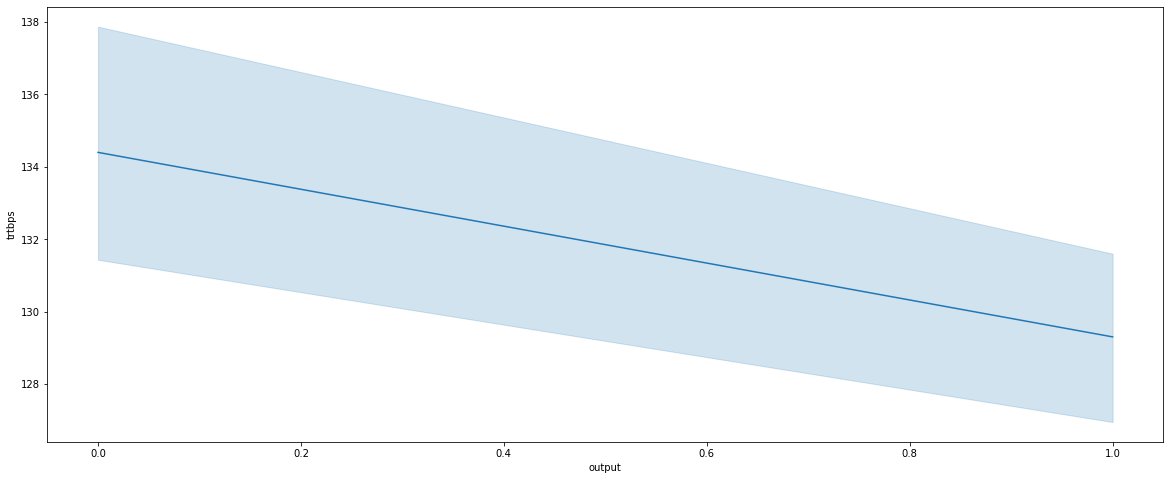

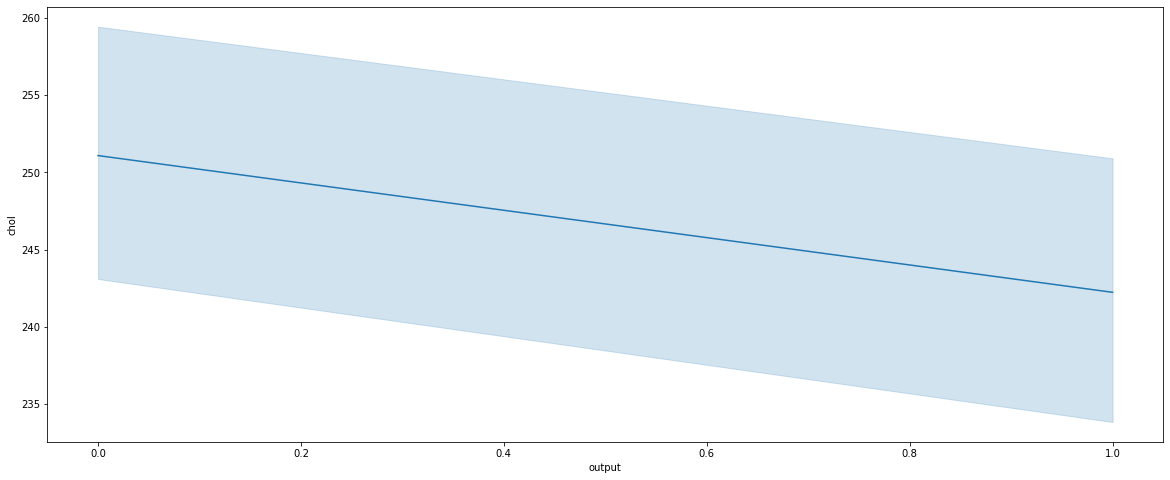

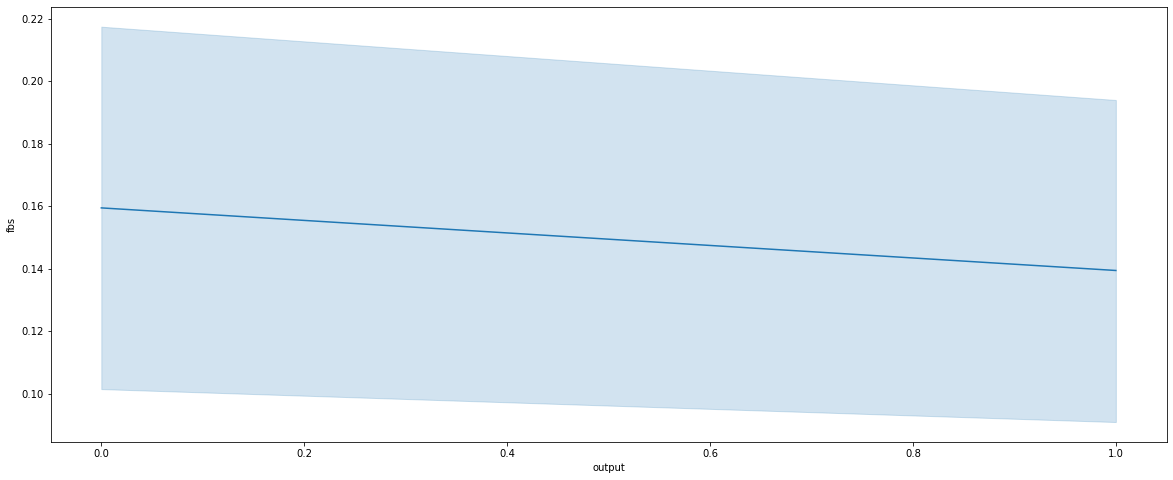

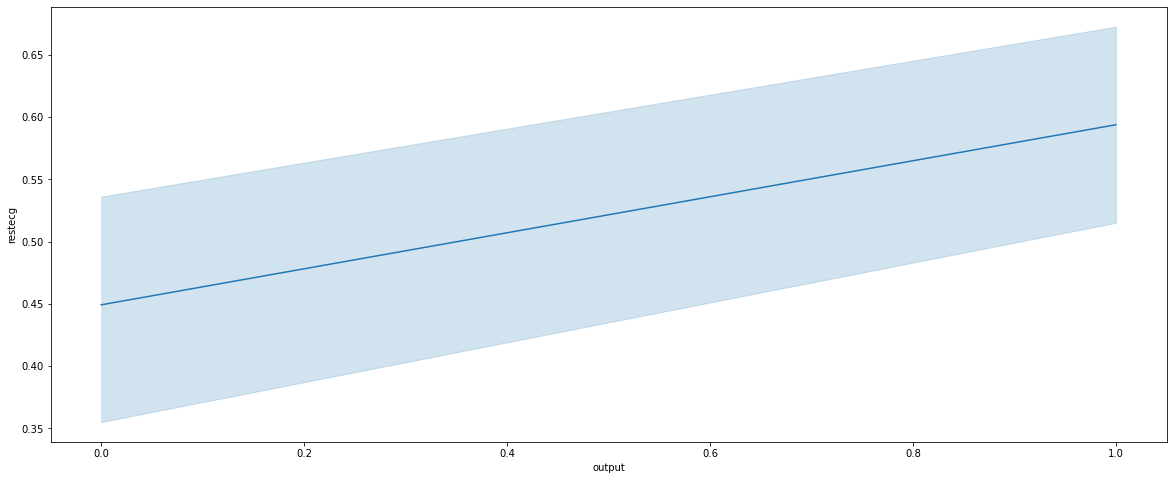

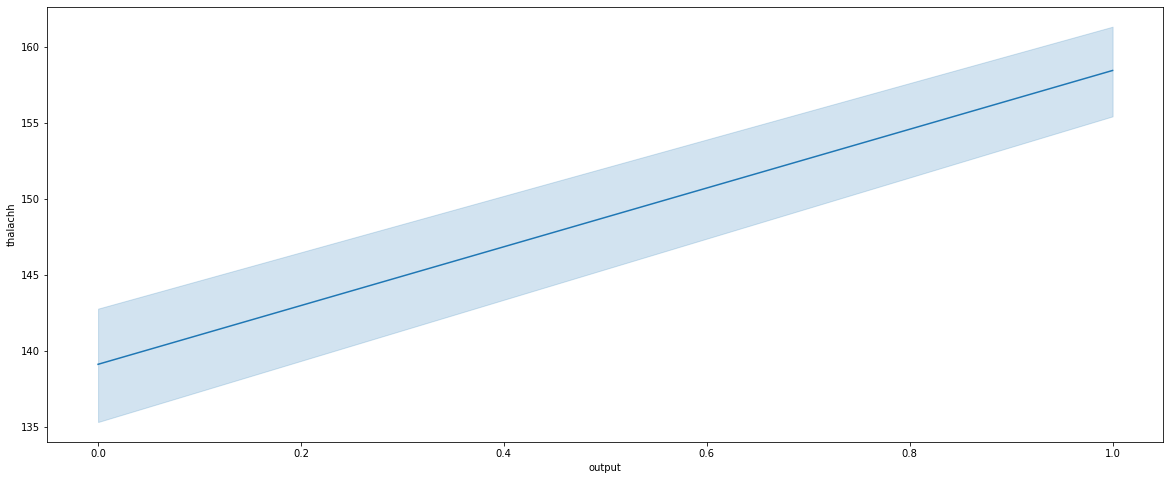

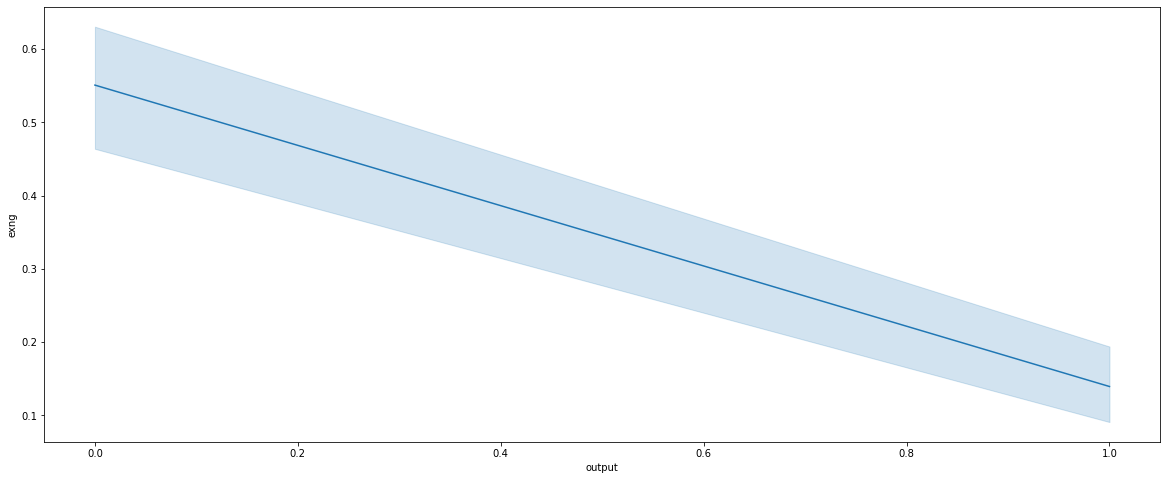

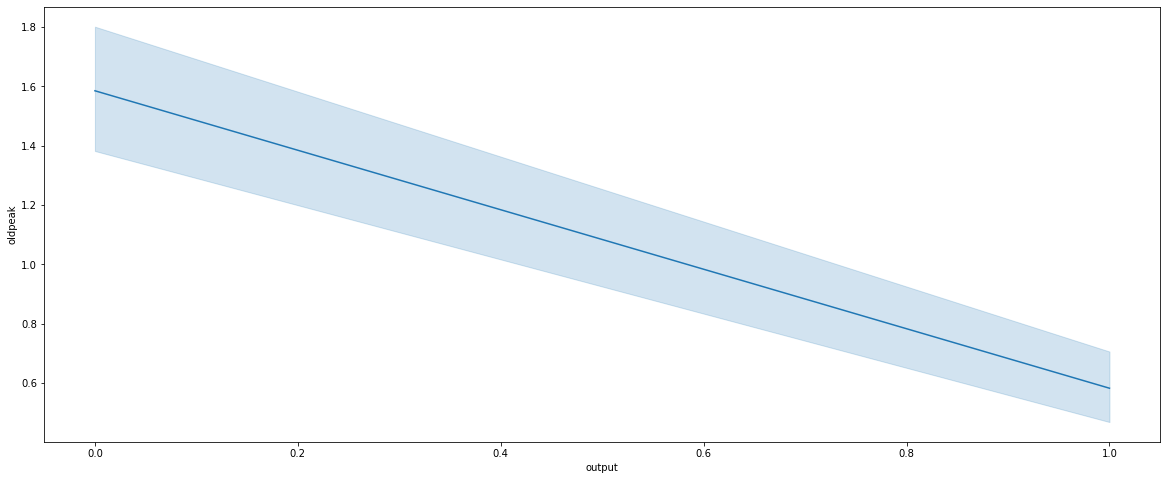

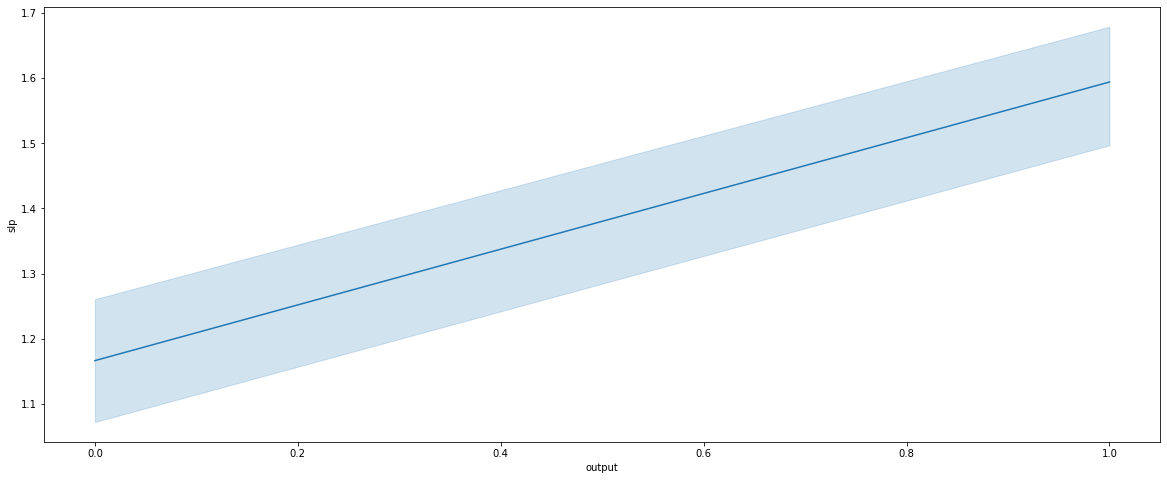

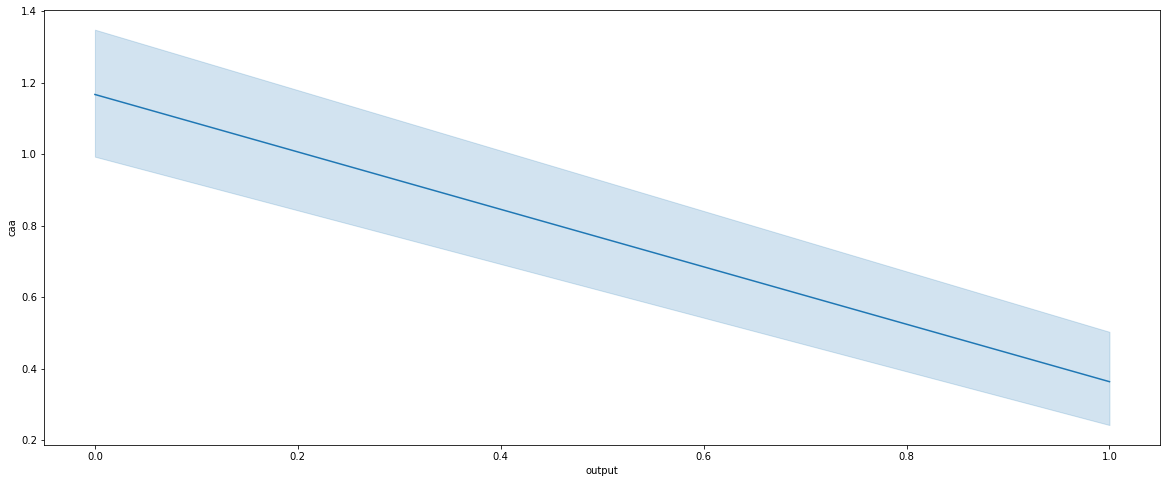

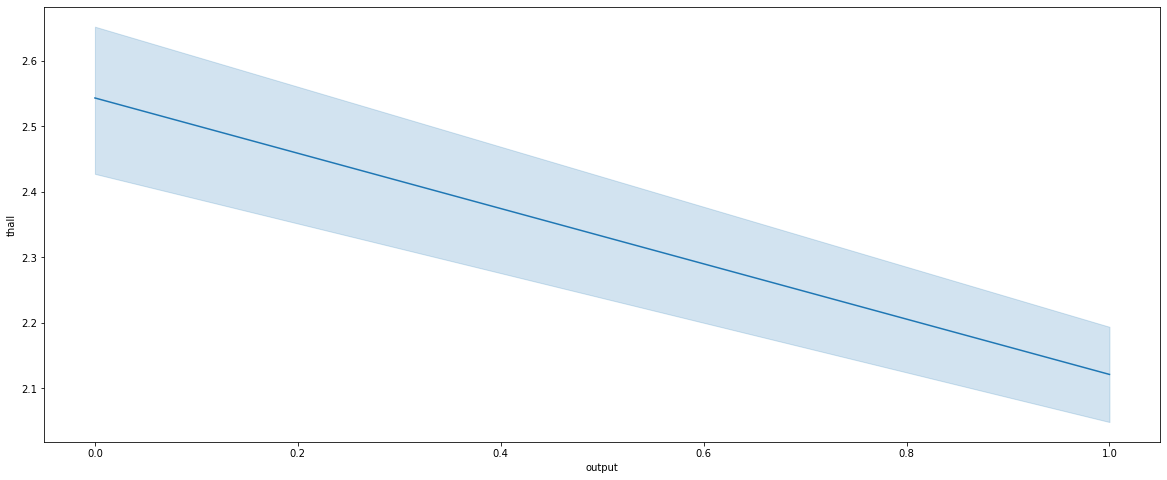

In [40]:
rand = 0
for i in data.columns:
    rand = rand + 1
    if rand < 14: 
        figure = plt.figure(figsize=(20,8))
        sns.lineplot(x="output",y=i,data=data)
        plt.show()
    else:
        break

### 3D

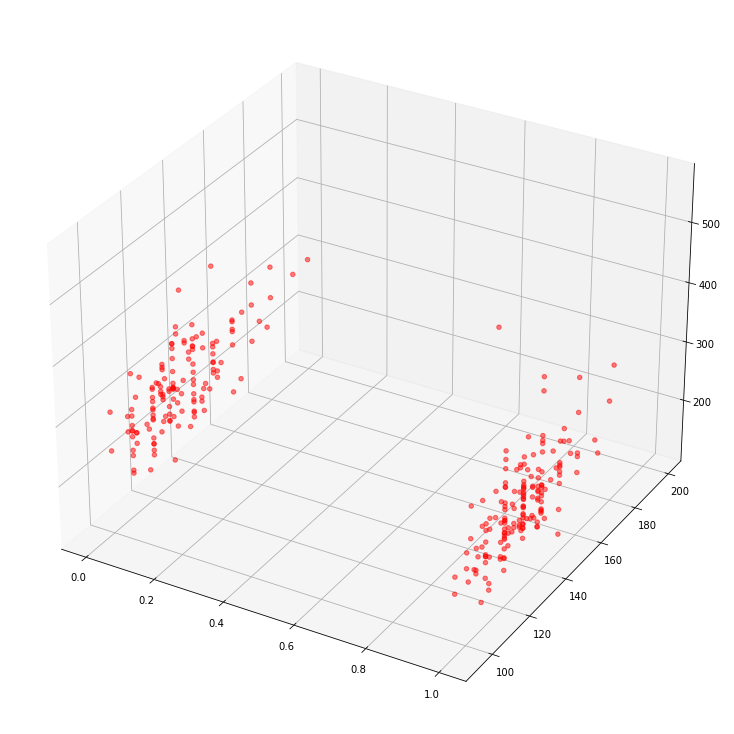

In [41]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(dataV["output"], dataV["trtbps"], dataV["chol"], c="red", s=20, alpha=0.5)
plt.show()

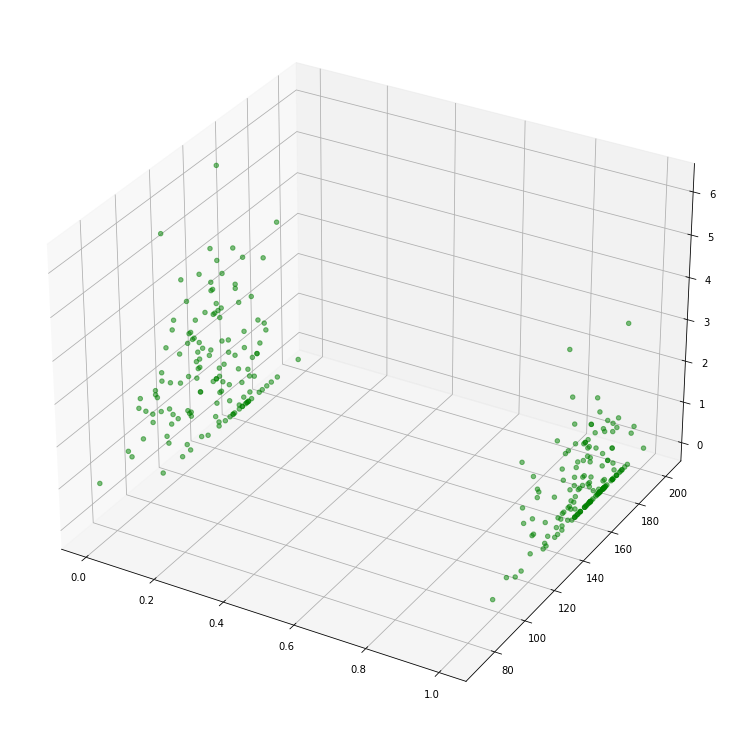

In [42]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(dataV["output"], dataV["thalachh"], dataV["oldpeak"], c="green", s=20, alpha=0.5)
plt.show()

# AGAINST VALUES

In [43]:
DataForA = data.copy()

In [44]:
clf = LocalOutlierFactor()
clf.fit_predict(DataForA)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

In [45]:
score = clf.negative_outlier_factor_
scoresorted = np.sort(score)
print(scoresorted[0:30])

[-5.05320148 -2.11399103 -1.9571162  -1.91649006 -1.84348128 -1.71797483
 -1.6819273  -1.66493678 -1.51848499 -1.51175035 -1.47178293 -1.42495893
 -1.37714881 -1.37536323 -1.37231117 -1.37023015 -1.36728947 -1.3582728
 -1.3560928  -1.35364331 -1.33705792 -1.29098986 -1.29029673 -1.27764619
 -1.27079991 -1.27038913 -1.26826297 -1.26330041 -1.24496194 -1.24245766]


In [46]:
point = scoresorted[12]
print(DataForA[score == point])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
39   65    0   2     160   360    0        0       151     0      0.8    2   

    caa  thall  output  
39    0      2       1  


In [47]:
against = DataForA < point
print(DataForA[against].notna().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [48]:
values = DataForA > point
print(DataForA[values].notna().sum())

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64


# MODELS

## X & Y FOR MODELS

In [50]:
x = data.drop("output",axis=1)
y = data["output"]

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.20,random_state=42)

## REGRESSION MODELS

In [52]:
lm = LinearRegression().fit(xTrain,yTrain)
pls = PLSRegression().fit(xTrain,yTrain)
ridge = Ridge().fit(xTrain,yTrain)
lasso = Lasso().fit(xTrain,yTrain)
elasticnet = ElasticNet().fit(xTrain,yTrain)
knnr = KNeighborsRegressor().fit(xTrain,yTrain)
cartr = DecisionTreeRegressor(random_state=42).fit(xTrain,yTrain)
baggr = BaggingRegressor(random_state=42,bootstrap_features=True,verbose=False).fit(xTrain,yTrain)
rfr = RandomForestRegressor(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmr = GradientBoostingRegressor(verbose=False).fit(xTrain,yTrain)
xgbr = XGBRegressor().fit(xTrain,yTrain)
lgbmr = LGBMRegressor().fit(xTrain,yTrain)
catbr = CatBoostRegressor(verbose=False).fit(xTrain,yTrain)

### COMPARISON

In [53]:
models = [lm,pls,ridge,lasso,elasticnet,knnr,
         cartr,baggr,rfr,gbmr,xgbr,lgbmr,catbr]

In [54]:
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,scoring="r2").mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
    print(name + ": ")
    print("-" * 10)
    print(R2CV)
    print(np.sqrt(error))
    print("-" * 30)

LinearRegression: 
----------
0.11758856932996134
0.44355896537777056
------------------------------
PLSRegression: 
----------
0.24170320065214868
0.4091370061456113
------------------------------
Ridge: 
----------
0.1544245008079254
0.43183492557977626
------------------------------
Lasso: 
----------
0.0563446746864789
0.4438954944607518
------------------------------
ElasticNet: 
----------
0.04892104693496446
0.4438704262851674
------------------------------
KNeighborsRegressor: 
----------
-0.07906666666666672
0.4853079532871984
------------------------------
DecisionTreeRegressor: 
----------
-0.3533333333333333
0.5584843434732633
------------------------------
BaggingRegressor: 
----------
0.23904583333333335
0.3928452379148574
------------------------------
RandomForestRegressor: 
----------
0.1946483333333334
0.4049291531214059
------------------------------
GradientBoostingRegressor: 
----------
-0.0009562062582594399
0.4606706030194253
------------------------------
XGBReg

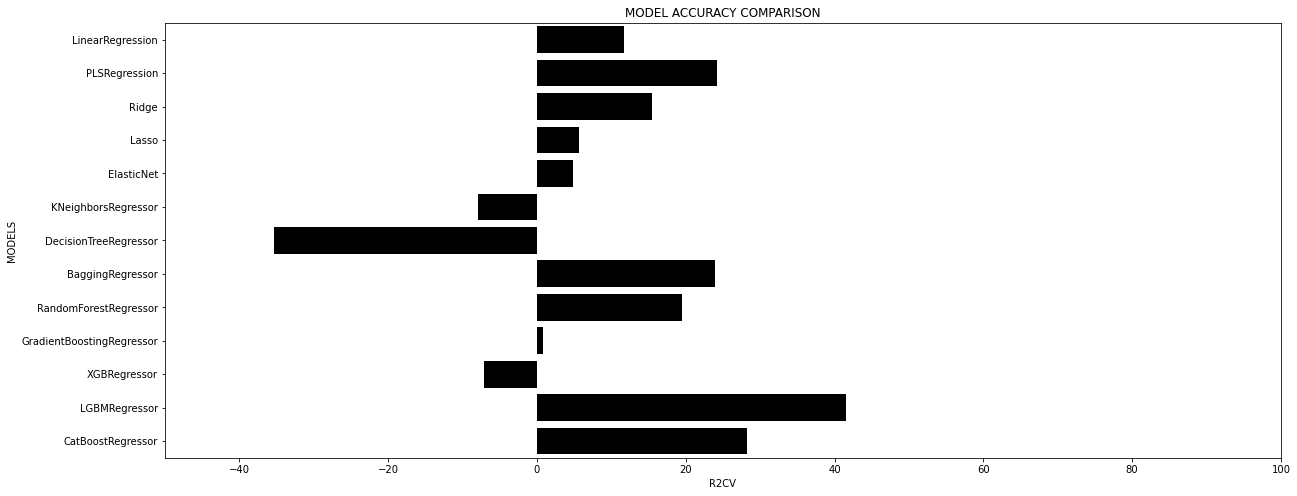

In [55]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,scoring="r2").mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(-50,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

## SPECIAL REGRESSION MODELS

### OLS

In [56]:
ols = sm.OLS(yTrain,xTrain).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                 output   R-squared (uncentered):                   0.771
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              59.41
Date:                Wed, 26 May 2021   Prob (F-statistic):                    8.96e-66
Time:                        22:55:34   Log-Likelihood:                         -92.436
No. Observations:                 242   AIC:                                      210.9
Df Residuals:                     229   BIC:                                      256.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### PCR

In [58]:
pca = PCA()
xRTrain = pca.fit_transform(scale(xTrain))
xRTest = pca.fit_transform(scale(xTest))

In [59]:
lmP = LinearRegression().fit(xRTrain,yTrain)
R2CV = cross_val_score(lmP,xRTest,yTest,cv=10,scoring="r2").mean()
error = -cross_val_score(lmP,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()

print(R2CV)
print("----"*30)
print(np.sqrt(error))

0.11758856932996449
------------------------------------------------------------------------------------------------------------------------
0.44355896537776984


### ANN

In [60]:
scaler = StandardScaler().fit(xTrain,yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

In [61]:
mlpr = MLPRegressor().fit(xTrain,yTrain)

R2CV = cross_val_score(mlpr,xRTest,yTest,cv=10,scoring="r2").mean()
error = -cross_val_score(mlpr,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()

print(R2CV)
print("----"*30)
print(np.sqrt(error))

0.15042242186043056
------------------------------------------------------------------------------------------------------------------------
0.46902881962112086


## CLASSIFICATION MODELS

In [62]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knnc = KNeighborsClassifier().fit(xTrain,yTrain)
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain,yTrain)
xgbc = XGBClassifier().fit(xTrain,yTrain)
lgbmc = LGBMClassifier().fit(xTrain,yTrain)
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)

[22:55:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### COMPARISON

In [63]:
modelsc = [lj,gnb,knnc,cartc,rfc,gbmc,xgbc,lgbmc,catbc]

In [64]:
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print(accuracy_score(yTest,predict))
    print(R2CV)
    print(np.sqrt(error))
    print("-" * 30)

LogisticRegression: 
----------
0.8688524590163934
0.8357142857142857
0.4053217416888888
------------------------------
GaussianNB: 
----------
0.8688524590163934
0.8523809523809524
0.3842122429322725
------------------------------
KNeighborsClassifier: 
----------
0.6885245901639344
0.6071428571428571
0.6267831705280088
------------------------------
DecisionTreeClassifier: 
----------
0.7540983606557377
0.738095238095238
0.511766315719159
------------------------------
RandomForestClassifier: 
----------
0.8360655737704918
0.819047619047619
0.42538497969766276
------------------------------
GradientBoostingClassifier: 
----------
0.7704918032786885
0.719047619047619
0.5300494136893097
------------------------------
[22:56:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'err

[22:56:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

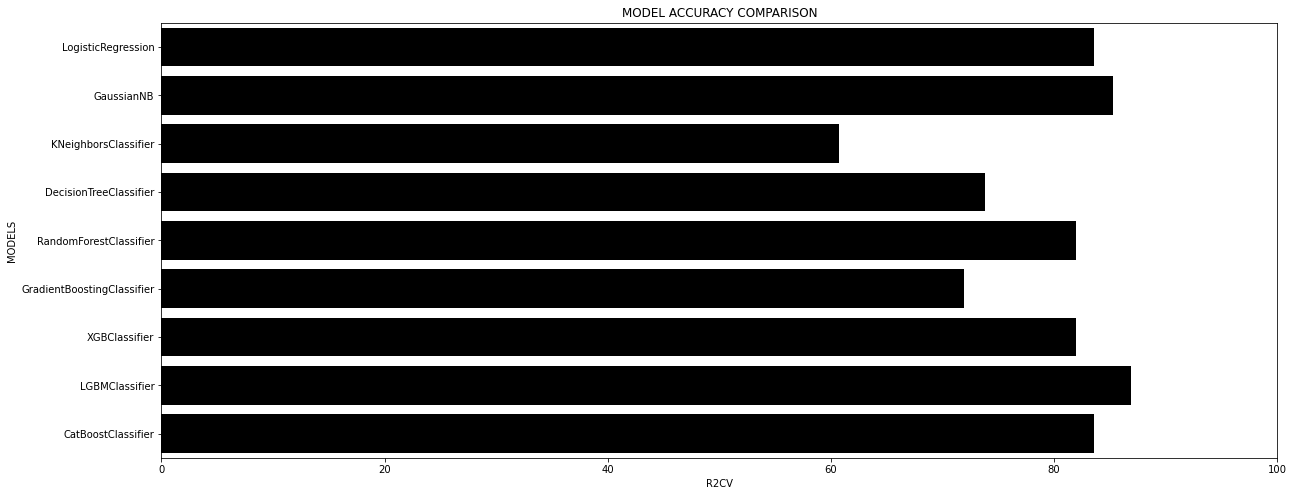

In [65]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in modelsc:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

LGBMClassifier is the best

## SPECIAL CLASSIFICATION MODELS

### ANN C MODELS & ERROR & TUNING & PREDICT

In [66]:
scaler = StandardScaler().fit(xTrain, yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

In [67]:
mlpc = MLPClassifier().fit(xRTrain,yTrain)
predict = mlpc.predict(xRTest)

R2CV = cross_val_score(mlpc,xRTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

0.8357142857142857
0.3841106397986879


## TUNING FOR BEST MODEL

In [68]:
params = {"n_estimators": [100, 500, 1000, 2000],
          "subsample": [0.6, 0.8, 1.0],
          "max_depth": [3, 4, 5, 6],
          "learning_rate": [0.1, 0.01, 0.02, 0.05],
          "min_child_samples": [5, 10, 20]}

In [ ]:
cv = GridSearchCV(lgbmc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

### FINAL MODEL

In [ ]:
lgbmctuned = LGBMClassifier(learning_rate=0.01,max_depth=5,min_child_samples=10,
                           n_estimators=100,subsample=0.6).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(lgbmctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
errortuned = -cross_val_score(lgbmctuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

BEST SCORE : 0.8688524590163934